In [139]:
import numpy as np
import glob, PIL
import os
import pathlib
import random
import cv2
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [140]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [141]:
x_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [142]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

LABEL:  9


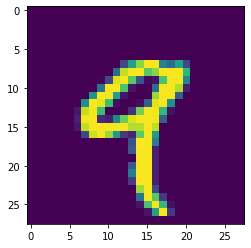

In [143]:
plt.imshow(x_train[4])
print("LABEL: ", y_train[4])

In [144]:
len(x_train)

60000

In [145]:
x_train.shape

(60000, 28, 28)

In [146]:
y_train.shape

(60000,)

In [147]:
x_train = x_train / 255
x_test = x_test / 255

In [148]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [149]:
x_train_flattened.shape

(60000, 784)

In [150]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# ANN Model

In [151]:
model1 = Sequential([
    layers.Dense(units=32, input_shape=(784,), activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [152]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                2570      
Total params: 71,146
Trainable params: 71,146
Non-trainable params: 0
_________________________________________________________________


In [153]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [154]:
hist1 = model1.fit(x_train_flattened, y_train, epochs=10, shuffle=True, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.6944 - accuracy: 0.7959 - val_loss: 0.3148 - val_accuracy: 0.9079
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2874 - accuracy: 0.9150 - val_loss: 0.2395 - val_accuracy: 0.9285
Epoch 3/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2337 - accuracy: 0.9309 - val_loss: 0.2061 - val_accuracy: 0.9378
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2003 - accuracy: 0.9408 - val_loss: 0.1836 - val_accuracy: 0.9454
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1761 - accuracy: 0.9470 - val_loss: 0.1700 - val_accuracy: 0.9494
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1579 - accuracy: 0.9527 - val_loss: 0.1567 - val_accuracy: 0.9530
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1431 - accuracy: 0.9572 - val_loss: 0.1474 - val_ac

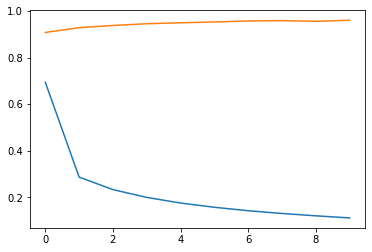

In [155]:
plt.plot(hist1.history["loss"])
plt.plot(hist1.history["val_accuracy"])

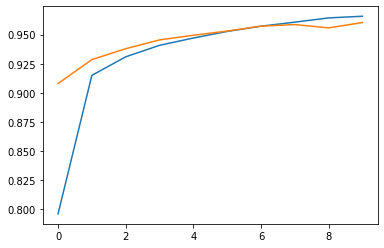

In [156]:
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["val_accuracy"])

In [157]:
pred = model.predict(x_test_flattened)
pred = [np.argmax(i) for i in pred]

In [158]:
accuracy_score(y_test,pred)*100

97.11999999999999

PREDICTED LABEL:  1


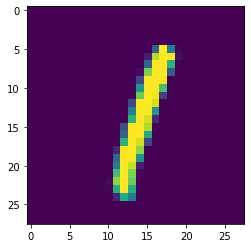

In [159]:
plt.imshow(x_test[5])
print("PREDICTED LABEL: ",pred[5])

In [160]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


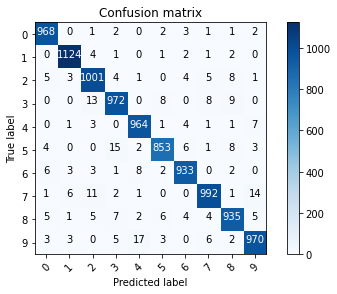

In [161]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
plot_confusion_matrix(cm=cm, classes=[0,1,2,3,4,5,6,7,8,9])

# CNN Model

In [162]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [163]:
x_train.shape

(60000, 28, 28, 1)

In [164]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(28,28,1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [165]:
model2 = Sequential([
  data_augmentation,
  layers.Conv2D(16, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(32, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [166]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_11 (Sequential)   (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 64)        

In [167]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [168]:
hist2 = model2.fit(x_train, y_train, epochs=10, batch_size=10, shuffle=True, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 44s 9ms/step - loss: 0.8129 - accuracy: 0.7308 - val_loss: 0.2845 - val_accuracy: 0.9081
Epoch 2/10
4800/4800 [==============================] - 45s 9ms/step - loss: 0.4055 - accuracy: 0.8698 - val_loss: 0.1956 - val_accuracy: 0.9398
Epoch 3/10
4800/4800 [==============================] - 41s 9ms/step - loss: 0.2948 - accuracy: 0.9071 - val_loss: 0.1455 - val_accuracy: 0.9553
Epoch 4/10
4800/4800 [==============================] - 44s 9ms/step - loss: 0.2401 - accuracy: 0.9253 - val_loss: 0.1160 - val_accuracy: 0.9637
Epoch 5/10
4800/4800 [==============================] - 52s 11ms/step - loss: 0.2010 - accuracy: 0.9360 - val_loss: 0.0986 - val_accuracy: 0.9688
Epoch 6/10
4800/4800 [==============================] - 51s 11ms/step - loss: 0.1765 - accuracy: 0.9435 - val_loss: 0.0905 - val_accuracy: 0.9712
Epoch 7/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.1529 - accuracy: 0.9503 - val_loss: 0.0880 - val

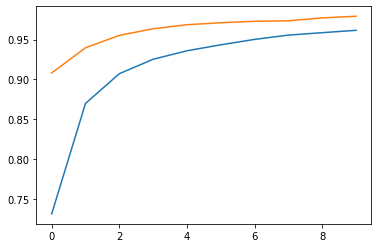

In [169]:
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history["val_accuracy"])

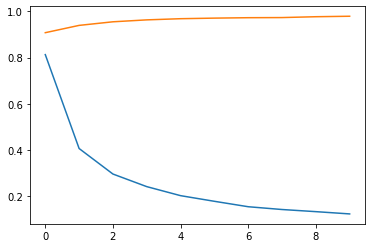

In [170]:
plt.plot(hist2.history["loss"])
plt.plot(hist2.history["val_accuracy"])

In [171]:
pred = model.predict(x_test_flattened)
pred = [np.argmax(i) for i in pred]

In [172]:
accuracy_score(y_test,pred)*100

97.11999999999999

PREDICTED LABEL:  4


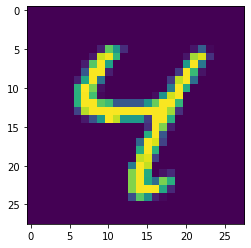

In [173]:
plt.imshow(x_test[6])
print("PREDICTED LABEL: ",pred[6])

Confusion matrix, without normalization


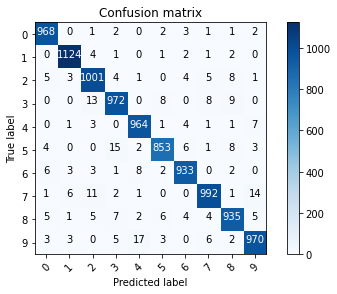

In [174]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
plot_confusion_matrix(cm=cm, classes=[0,1,2,3,4,5,6,7,8,9])